# Homework 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from skimage import io
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

---
# Часть 1: Свертки

## Реализация

В этом разделе вы реализуете две версии свертки:
- `conv_nested`
- `conv_fast`

Сначала запустите нижеуказанную кодовую ячейку, чтобы загрузить изображение для работы.

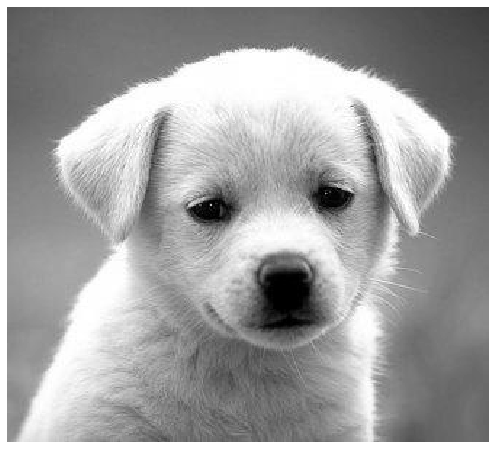

In [2]:
# Open image as grayscale
img = io.imread('img/dog.jpg', as_gray=True)

# Show image
plt.imshow(img)
plt.axis('off')
plt.show()

Теперь реализуем функцию **`conv_nested`** в **`filters.py`**. Это наивная реализация convolution, использующая 4 вложенных for-loops. В качестве входа и выхода она берет изображение $f$ и ядро $h$, которое имеет ту же форму, что и входное изображение. Запуск этой реализации должен занять несколько секунд.

*- Подсказка: Возможно, будет проще реализовать $(h*f)$*.

Сначала мы протестируем вашу функцию `conv_nested` на простом входе.

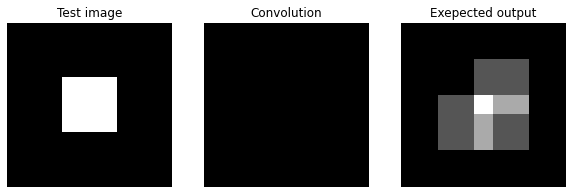

In [3]:
from filters import conv_nested

# Simple convolution kernel.
kernel = np.array(
[
    [1,0,1],
    [0,0,0],
    [1,0,0]
])

# Create a test image: a white square in the middle
test_img = np.zeros((9, 9))
test_img[3:6, 3:6] = 1

# Run your conv_nested function on the test image
test_output = conv_nested(test_img, kernel)

# Build the expected output
expected_output = np.zeros((9, 9))
expected_output[2:7, 2:7] = 1
expected_output[5:, 5:] = 0
expected_output[4, 2:5] = 2
expected_output[2:5, 4] = 2
expected_output[4, 4] = 3

# Plot the test image
plt.subplot(1,3,1)
plt.imshow(test_img)
plt.title('Test image')
plt.axis('off')

# Plot your convolved image
plt.subplot(1,3,2)
plt.imshow(test_output)
plt.title('Convolution')
plt.axis('off')

# Plot the exepected output
plt.subplot(1,3,3)
plt.imshow(np.flip(expected_output))
plt.title('Exepected output')
plt.axis('off')
plt.show()

# Test if the output matches expected output
assert np.max(test_output - expected_output) < 1e-10, "Your solution is not correct."

Теперь давайте протестируем вашу функцию `conv_nested` на реальном изображении.

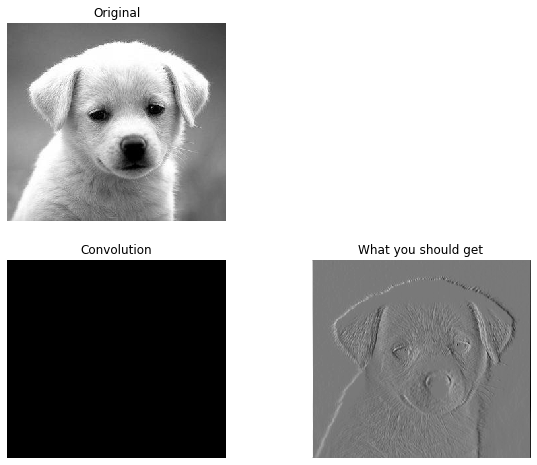

In [4]:
from filters import conv_nested

# Simple convolution kernel.
# Feel free to change the kernel to see different outputs.
kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

out = conv_nested(img, kernel)

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Plot your convolved image
plt.subplot(2,2,3)
plt.imshow(out)
plt.title('Convolution')
plt.axis('off')

# Plot what you should get
solution_img = cv2.imread('img/convoluted_dog.jpg')
plt.subplot(2,2,4)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

plt.show()

Реализуем более эффективный вариант свертки с использованием операций с массивами в numpy. Как показано в лекции, свертку можно рассматривать как скользящее окно, которое вычисляет сумму значений пикселей, взвешенных перевернутым ядром. Более быстрая версия: i) будет иметь нулевое изображение, ii) перевернёт ядро по горизонтали и вертикали, и iii) вычислит взвешенную сумму окрестностей в каждом пикселе.

Во-первых, реализовать функцию **`zero_pad`** в **`filters.py`**.

(300, 332)


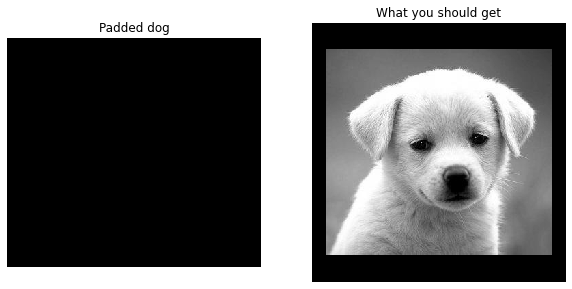

In [5]:
from filters import zero_pad

pad_width = 20 # width of the padding on the left and right
pad_height = 40 # height of the padding on the top and bottom

padded_img = zero_pad(img, pad_height, pad_width)

# Plot your padded dog
plt.subplot(1,2,1)
print(padded_img.shape)
plt.imshow(padded_img)
plt.title('Padded dog')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('img/padded_dog.jpg', as_gray=True)
plt.subplot(1,2,2)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

plt.show()

Далее, выполните функцию **`conv_fast`** в **`filters.py`** с помощью `zero_pad`. Запустите код ниже, чтобы сравнить результаты по двум реализациям. `conv_fast` должна работать значительно быстрее, чем `conv_nested`.  
В зависимости от вашей реализации и компьютера, `conv_nested` должен занять несколько секунд и `conv_fast` должен работать примерно в 5 раз быстрее.

conv_nested: took 0.001003 seconds.
conv_fast: took 0.000000 seconds.


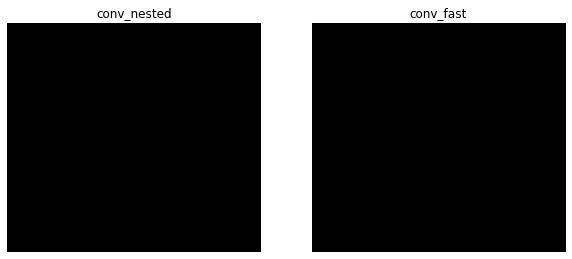

In [6]:
from filters import conv_fast

t0 = time()
out_fast = conv_fast(img, kernel)
t1 = time()
out_nested = conv_nested(img, kernel)
t2 = time()

# Compare the running time of the two implementations
print("conv_nested: took %f seconds." % (t2 - t1))
print("conv_fast: took %f seconds." % (t1 - t0))

# Plot conv_nested output
plt.subplot(1,2,1)
plt.imshow(out_nested)
plt.title('conv_nested')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(out_fast)
plt.title('conv_fast')
plt.axis('off')

# Make sure that the two outputs are the same
if not (np.max(out_fast - out_nested) < 1e-10):
    print("Different outputs! Check your implementation.")

### Задание со звездочкой

Разработайте более быструю версию свертки и реализуйте **`conv_faster`** в **`filters.py`**. Вы заработаете дополнительный балл в том случае, если `conv_faster` будет работать быстрее (с достаточным запасом), чем `conv_fast` **и** выдаст тот же результат.

conv_fast: took 0.000000 seconds.
conv_faster: took 0.000000 seconds.


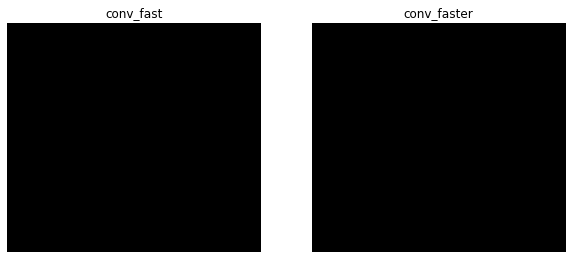

In [7]:
from filters import conv_faster

t0 = time()
out_fast = conv_fast(img, kernel)
t1 = time()
out_faster = conv_faster(img, kernel)
t2 = time()

# Compare the running time of the two implementations
print("conv_fast: took %f seconds." % (t1 - t0))
print("conv_faster: took %f seconds." % (t2 - t1))

# Plot conv_nested output
plt.subplot(1,2,1)
plt.imshow(out_fast)
plt.title('conv_fast')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(out_faster)
plt.title('conv_faster')
plt.axis('off')

# Make sure that the two outputs are the same
if not (np.max(out_fast - out_faster) < 1e-10):
    print("Different outputs! Check your implementation.")

---
# Часть 2: Кросс-корреляция

Кросс-корреляция двух 2D сигналов $f$ и $g$ определяется следующим образом:
$$(f\star{g})[m,n]=\sum_{i=-\infty}^\infty\sum_{j=-\infty}^\infty f[i,j]\cdot g[m-i,n-j]$$

## Проверка шаблона с помощью кросс-корреляцией 

Предположим, что ты продавщица в продуктовом магазине. Одна из ваших обязанностей - периодически проверять полки и складировать их всякий раз, когда есть распроданные товары. Вы устали от этой кропотливой работы и решили построить систему компьютерного зрения, которая отслеживает предметы на полке.

К счастью, в CS131 вы узнали, что для сопоставления шаблонов можно использовать кросс-корреляцию: шаблон $g$ умножается на регионы с большим изображением $f$, чтобы измерить, насколько каждый регион похож на шаблон.

Шаблон товара (`template.jpg`) и изображение полки (`shelf.jpg`) предоставляются. Мы будем использовать кросс-корреляцию, чтобы найти товар на полке.

Реализуйте функцию **`cross_correlation`** в **`filters.py`** и запустите код ниже.

*- Подсказка: Вы можете использовать функцию `conv_fast`, которую вы реализовали в предыдущем вопросе.

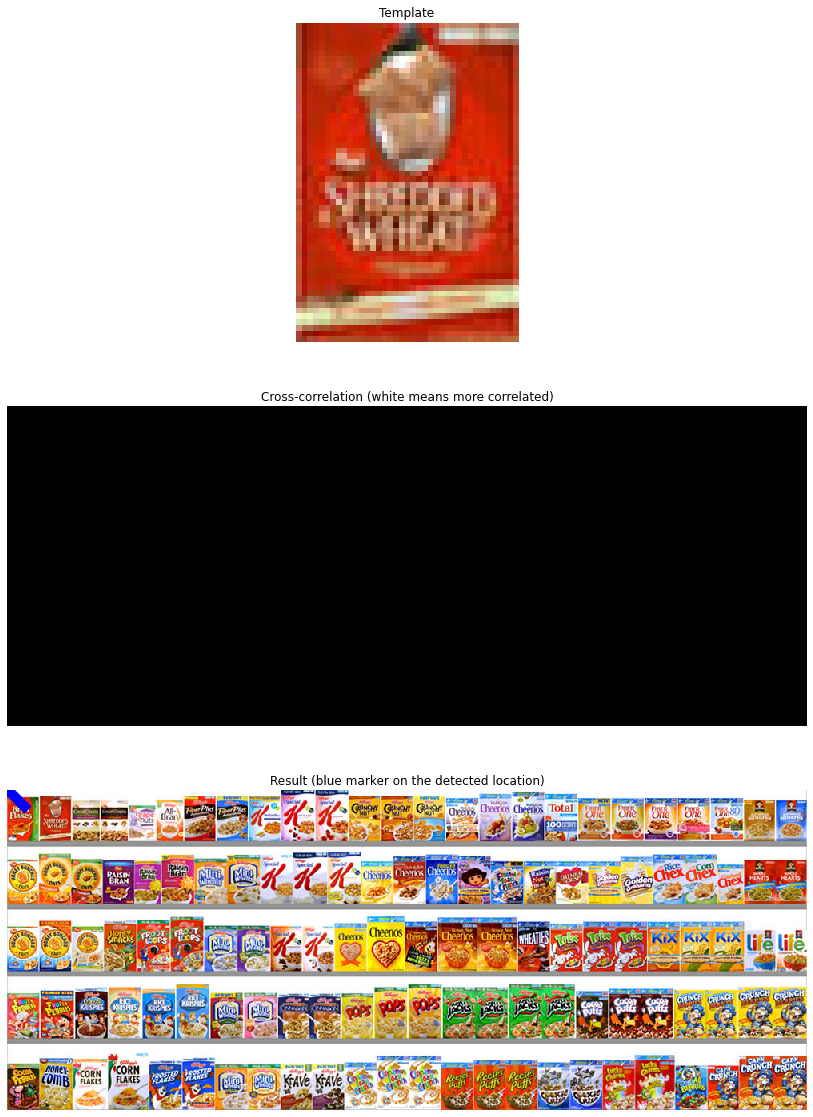

In [8]:
from filters import cross_correlation

# Load template and image in grayscale
img = io.imread('img/shelf.jpg')
img_grey = io.imread('img/shelf.jpg', as_gray=True)
temp = io.imread('img/template.jpg')
temp_grey = io.imread('img/template.jpg', as_gray=True)

# Perform cross-correlation between the image and the template
out = cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y, x = np.unravel_index(out.argmax(), out.shape)

# Display product template
plt.figure(figsize=(25,20))
plt.subplot(3, 1, 1)
plt.imshow(temp)
plt.title('Template')
plt.axis('off')

# Display cross-correlation output
plt.subplot(3, 1, 2)
plt.imshow(out)
plt.title('Cross-correlation (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img)
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

# Draw marker at detected location
plt.plot(x, y, 'bx', ms=40, mew=10)
plt.show()

### Интерпретация

Как выглядит вывод кросс-корреляционного фильтра? Способен ли он правильно определить продукт? Объясните, какие проблемы могут возникнуть при использовании необработанного шаблона в качестве фильтра.

**Ваш ответ:** * Запишите ваше решение в эту ячейку с пометками.*

---
## Нулевая кросс-корреляция

Решение этой проблемы заключается в вычитании среднего значения шаблона так, чтобы оно имело нулевое среднее значение.

Реализуйте функцию **`zero_mean_cross_correlation`** в файле **`filters.py`** и запустите код ниже.

**Если ваша реализация корректна, то вы должны увидеть синий крест по центру от правильной коробки с хлопьями**.

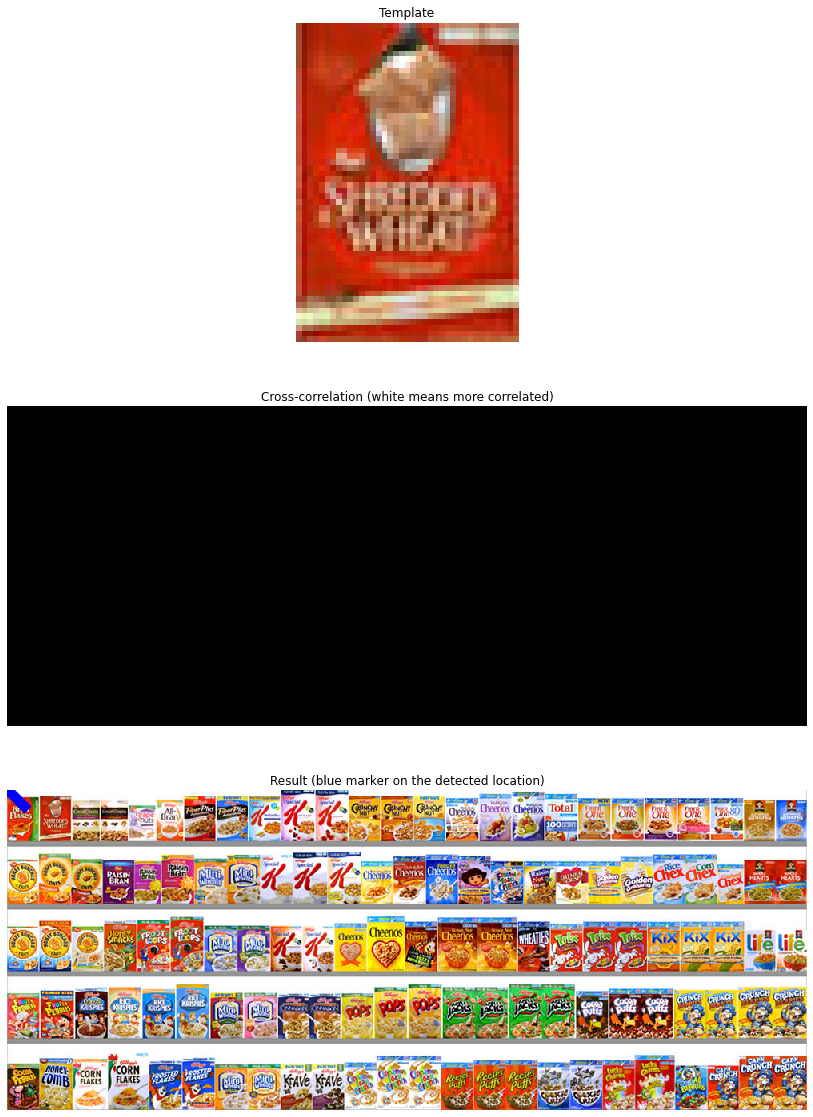

In [9]:
from filters import zero_mean_cross_correlation

# Perform cross-correlation between the image and the template
out = zero_mean_cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y,x = (np.unravel_index(out.argmax(), out.shape))

# Display product template
plt.figure(figsize=(30,20))
plt.subplot(3, 1, 1)
plt.imshow(temp)
plt.title('Template')
plt.axis('off')

# Display cross-correlation output
plt.subplot(3, 1, 2)
plt.imshow(out)
plt.title('Cross-correlation (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img)
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

# Draw marker at detcted location
plt.plot(x, y, 'bx', ms=40, mew=10)
plt.show()


Кроме того, можно определить наличие продукта с соответствующим масштабированием и пороговым значением.

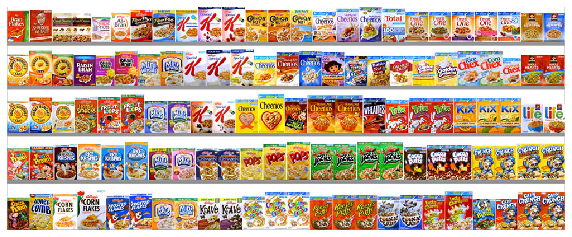

The product is not on the shelf


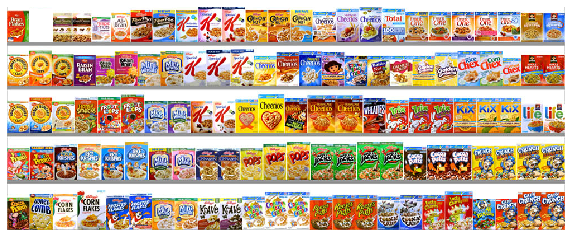

The product is not on the shelf


In [10]:
def check_product_on_shelf(shelf, product):
    out = zero_mean_cross_correlation(shelf, product)
    
    # Scale output by the size of the template
    out = out / float(product.shape[0]*product.shape[1])
    
    # Threshold output (this is arbitrary, you would need to tune the threshold for a real application)
    out = out > 0.025
    
    if np.sum(out) > 0:
        print('The product is on the shelf')
    else:
        print('The product is not on the shelf')

# Load image of the shelf without the product
img2 = io.imread('img/shelf_soldout.jpg')
img2_grey = io.imread('img/shelf_soldout.jpg', as_gray=True)

plt.imshow(img)
plt.axis('off')
plt.show()
check_product_on_shelf(img_grey, temp_grey)

plt.imshow(img2)
plt.axis('off')
plt.show()
check_product_on_shelf(img2_grey, temp_grey)

---
## Нормализованная кросс-корреляция
Однажды свет возле полки погаснет, и устройство слежения за продуктами начнет работать неисправно. `zero_mean_cross_correlation` не устойчива к изменению состояния освещения. Код, приведенный ниже, демонстрирует это.

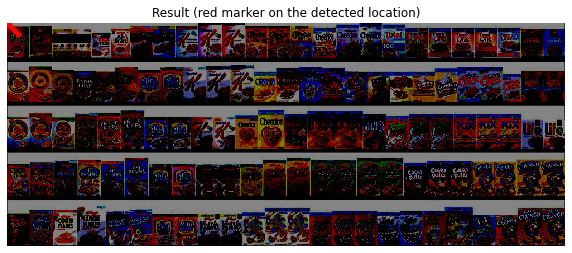

In [11]:
from filters import normalized_cross_correlation

# Load image
img = io.imread('img/shelf_dark.jpg')
img_grey = io.imread('img/shelf_dark.jpg', as_gray=True)

# Perform cross-correlation between the image and the template
out = zero_mean_cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y,x = (np.unravel_index(out.argmax(), out.shape))

# Display image
plt.imshow(img)
plt.title('Result (red marker on the detected location)')
plt.axis('off')

# Draw marker at detcted location
plt.plot(x, y, 'rx', ms=25, mew=5)
plt.show()

Решение заключается в нормализации пикселей изображения и шаблона на каждом шаге перед их сравнением. Это называется **нормализованной кросс-корреляцией**.

Математическим определением нормализованной кросс-корреляции является $f$ и шаблон $g$:
$$(f\star{g})[m,n]=\sum_{i,j} \frac{f[i,j]-\overline{f_{m,n}}}{\sigma_{f_{m,n}}} \cdot \frac{g[i-m,j-n]-\overline{g}}{\sigma_g}$$

Где:
- $f_{m,n}$ - это патч-изображение в позиции $(m,n)$
- $\overline{f_{m,n}}$ - это среднее значение изображения патча $f_{m,n}$.
- $\sigma_{f_{m,n}}$ - стандартное отклонение изображения патча $f_{m,n}$ 
- $\overline{g}$ - это среднее значение шаблона $g$.
- $\sigma_g$ - стандартное отклонение шаблона $g$.

Реализуйте функцию **`normalized_cross_correlation`** в файле **`filters.py`** и запустите код ниже.

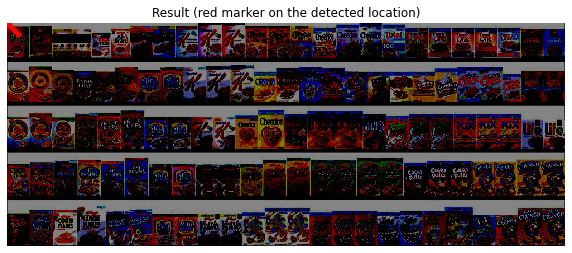

In [12]:
from filters import normalized_cross_correlation

# Perform normalized cross-correlation between the image and the template
out = normalized_cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y,x = (np.unravel_index(out.argmax(), out.shape))

# Display image
plt.imshow(img)
plt.title('Result (red marker on the detected location)')
plt.axis('off')

# Draw marker at detcted location
plt.plot(x, y, 'rx', ms=25, mew=5)
plt.show()